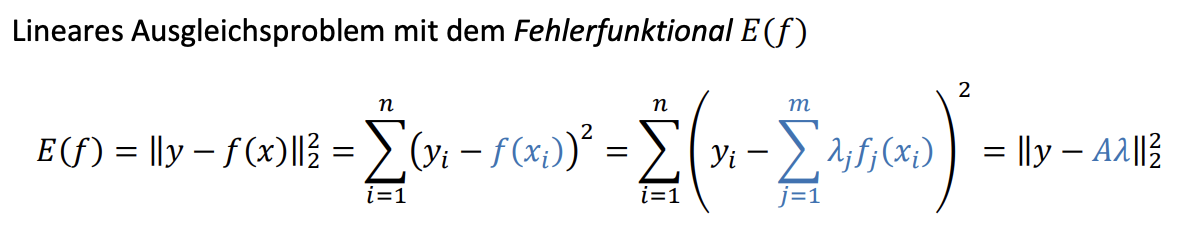

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Normalgleichung: 	 [0.5 0.5] 

E(f)		= 2.7733391199176196e-32


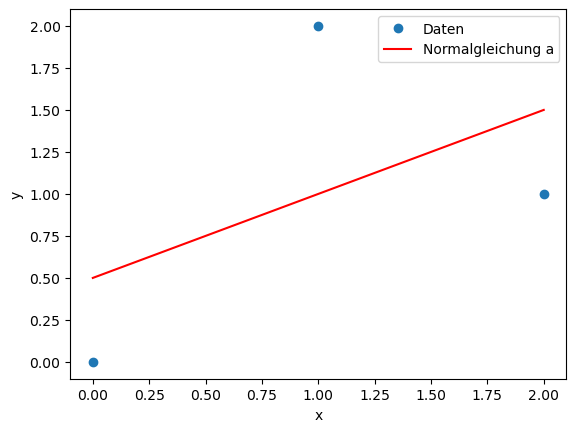

In [6]:
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Latex

'''INPUT'''
x_sym = sp.symbols('x')
x = np.array([0, 1, 2])
y = np.array([0, 2, 1])
funcs = np.array([x_sym ** 1, x_sym ** 0])
'''INPUT'''

def create_funcs_matrix(x, funcs, x_sym):
    n = len(x)
    m = len(funcs)
    A = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            A[i][j] = funcs[j].subs([(x_sym, x[i])])
    return A

def get_fx(lambdas, funcs, x):
    f = 0
    for lam, func in zip(lambdas, funcs):
        f += lam * func
    return sp.lambdify(x, f)

def normalgleichung(A, y):
    return np.linalg.solve(A.T @ A, A.T @ y)

def fehlerfunktionale(A, y, lambdas):
    Ef = np.linalg.norm(y - A @ lambdas, 2) ** 2
    print(f"E(f)\t\t= {Ef}")

def display_with_latex():
    # Basisfunktionen ausgeben
    basisfunktionen_str = ', '.join([sp.latex(func) for func in funcs])
    display(Latex(f"Basisfunktionen: $[{basisfunktionen_str}]$"))

    # Matrix A ausgeben
    A = create_funcs_matrix(x, funcs, x_sym)
    A_str = sp.latex(sp.Matrix(A))
    display(Latex(f"Matrix $A$: $${A_str}$$"))

    # Vektor y ausgeben
    y_str = sp.latex(sp.Matrix(y))
    display(Latex(f"Vektor $y$: $${y_str}$$"))

    # Berechnung von A^T*A und A^T*y
    ATA = A.T @ A
    ATy = A.T @ y
    ATA_str = sp.latex(sp.Matrix(ATA))
    ATy_str = sp.latex(sp.Matrix(ATy))

    # Ausgabe von A^T*A und A^T*y
    display(Latex(f"Matrix $A^T \cdot A$: $${ATA_str}$$"))
    display(Latex(f"Matrix $A^T \cdot y$: $${ATy_str}$$"))

if __name__ == "__main__":
    np.set_printoptions(suppress=True)
    display_with_latex()  # Anzeige der Basisfunktionen, Matrix A und Vektor y mit Latex

    A = create_funcs_matrix(x, funcs, x_sym)
    lambdas = normalgleichung(A, y)
    f = get_fx(lambdas, funcs, x_sym)
    y_pred = f(x)

    # Normalgleichung
    print(f"Normalgleichung: \t {lambdas} \n")

    # Fehlerfunktionale
    fehlerfunktionale(A, y_pred, lambdas)

    # Plot
    plt.plot(x, y, 'o', label='Daten')
    plt.plot(x, y_pred, '-r', label='Normalgleichung a')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()